In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('white')

loss_vals = [-10, -100, -300]
types = ['no-WN', 'EWN', 'SWN']
seeds = ['9192', '3576', '2356']
prefix = 'test_acc_prune'
cutoffs = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
fin_test_mean = np.zeros((len(loss_vals), len(types), len(cutoffs)))
fin_test_std = np.zeros((len(loss_vals), len(types), len(cutoffs)))

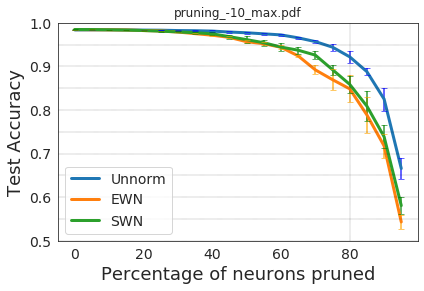

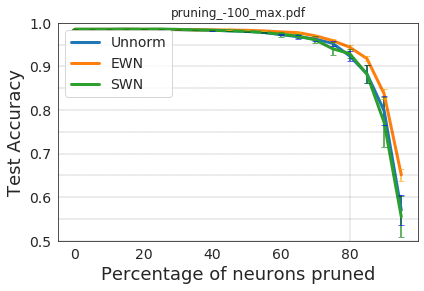

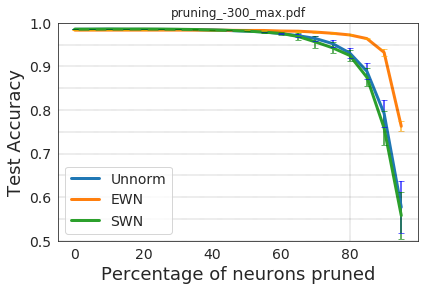

In [11]:
for ind1, l in enumerate(loss_vals):
    for ind2, type in enumerate(types):
        test_acc = np.zeros((len(seeds), len(cutoffs), ind1+2))
        for seed_index, seed in enumerate(seeds):
            dir = '../MNIST_pruning/' + seed + '/'
            for ind3 in range(ind1+2):
                test_acc1 = []
                if ind3==0:
                    file = dir + prefix + '_' + type + '_diff_init_' + str(l) + '.txt'
                elif ind3==1:
                    file = dir + prefix + '_' + type + '_diff_0_' + str(l) + '.txt'
                else:
                    file = dir + prefix + '_' + type + '_diff_' + str(loss_vals[ind3-2]) + '_' + str(l) + '.txt'
                with open(file, 'r') as f:
                    while (True):
                        t = f.readline()
                        if t == '':
                            break
                        t = t.strip('\n')
                        test_acc1.append(float(t))
                test_acc[seed_index, :, ind3] = np.array(test_acc1)

            temp = np.max(test_acc, axis=2)
            fin_test_mean[ind1, ind2] = np.mean(temp, axis=0)
            fin_test_std[ind1, ind2] = np.std(temp, axis=0)

    plt.ylim((0.5, 1.0))
    plt.plot(cutoffs, fin_test_mean[ind1, 0], label='Unnorm', linewidth=3)
    plt.plot(cutoffs, fin_test_mean[ind1, 1], label='EWN', linewidth=3)
    plt.plot(cutoffs, fin_test_mean[ind1, 2], label='SWN', linewidth=3)
    plt.errorbar(cutoffs, fin_test_mean[ind1, 0], yerr=fin_test_std[ind1, 0], fmt='none', color='blue', capsize=3, alpha=0.6, elinewidth=2)
    plt.errorbar(cutoffs, fin_test_mean[ind1, 1], yerr=fin_test_std[ind1, 1], fmt='none', color='orange', capsize=3, alpha=0.6, elinewidth=2)
    plt.errorbar(cutoffs, fin_test_mean[ind1, 2], yerr=fin_test_std[ind1, 2], fmt='none', color='green', capsize=3, alpha=0.6, elinewidth=2)
    for y_val in np.arange(0.5, 1.01, 0.05):
        plt.axhline(y_val, ls='--', lw=0.2, c='black')
    plt.axvline(80, ls='--', lw=0.2, c='black')
    plt.xlabel('Percentage of neurons pruned', fontsize=18)
    plt.ylabel('Test Accuracy', fontsize=18)
    plt.legend(prop={'size':14})
    plt.locator_params(axis='y', nbins=6)
    plt.locator_params(axis='x', nbins=6)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.title('pruning_' + str(l) + '_max.pdf')
    plt.show()